In [4]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

from funcs.ml import simulate_brackets, tourney_sim_test, analysis, tourney_sim_baseline, tourney_sim_perfect, prep_model

In [5]:
YEAR = 2024

names = ["conf", "seed", "s", "rank"]
bools = [False, False, False, False]

In [6]:
def add_one_bool_list(bools: list):
    carry = 1
    base = 2

    for i in range(len(bools)):
        
        bools[len(bools) - 1 - i] += carry

        carry = int(bools[len(bools) - 1 - i] / base)
        bools[len(bools) - 1 - i] = bools[len(bools) - 1 - i] % base
    
    bools = [True if i == 1 else False for i in bools]
    return bools

processed_data_rank

Brackets Simulated: 25
Average Upsets: 2.52
Average Bracket Score: 126.44
Average Bracket Round Scores: [29, 26, 14, 12, 23, 20]
Max Bracket Score: 155
Max Bracket Round Scores: [32, 32, 24, 20, 26, 21]


------------------------------------------------

processed_data_s

Brackets Simulated: 25
Average Upsets: 2.6
Average Bracket Score: 121.28
Average Bracket Round Scores: [28, 22, 13, 13, 24, 20]
Max Bracket Score: 155
Max Bracket Round Scores: [32, 32, 24, 16, 26, 25]


------------------------------------------------

processed_data_s_rank

Brackets Simulated: 25
Average Upsets: 2.32
Average Bracket Score: 123.4
Average Bracket Round Scores: [26, 25, 13, 12, 23, 20]
Max Bracket Score: 144
Max Bracket Round Scores: [32, 32, 16, 16, 26, 22]


------------------------------------------------

processed_data_seed

Brackets Simulated: 25
Average Upsets: 2.92
Average Bracket Score: 120.88
Average Bracket Round Scores: [29, 21, 13, 13, 23, 20]
Max Bracket Score: 147
Ma

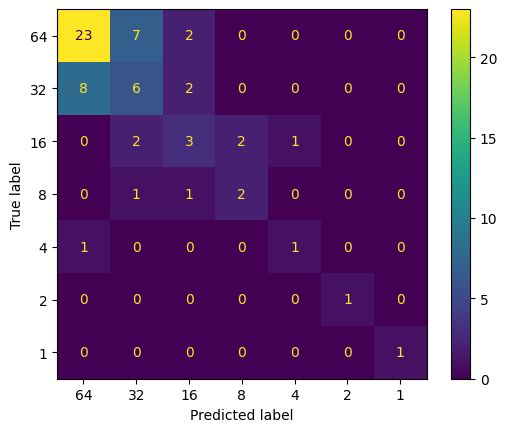


Bracket Score: (155, [32, 32, 24, 20, 24, 23])

R Score: 0.23319554627892747

Accuracy Score: 0.578125



In [7]:
best_model = None
best_dir = None
best_max_score = -1
best_avg_score = -1
best_X_test = None
best_y_test = None

for j in range(2 ** len(bools) - 1):
    dir = "processed_data"

    bools = add_one_bool_list(bools)

    for i in range(len(bools)):
        if bools[i]:
            dir += "_" + names[i]
    
    conf, seed, s, rank = bools

    print(dir)
    print()

    model, X_train, y_train, X_test, y_test, team_key, test_case, avg_score, max_score  = simulate_brackets(input_directory = dir, year = YEAR, n = 25, n_mod = 25)
    
    print()
    print("------------------------------------------------")
    print()

    teams, preds = tourney_sim_test(test_case, X_test, model, team_key, False)

    if(avg_score > best_avg_score):
        best_model = model
        best_dir = dir
        best_max_score = max_score
        best_avg_score = avg_score

X_train, y_train, X_test, y_test, team_key, test_case = prep_model(YEAR, best_dir)
teams, preds = tourney_sim_test(test_case, X_test, best_model, team_key)
y_test: pd.Series = y_test.loc[teams]
analysis(y_test, preds)